# The Hit Formula: Spotify Data Analysis
**Author:** Abi Jacob Cheriyan
**Course:** CSCI/MATH 608

## Project Goal
As a music producer, I want to analyze the audio features of Spotify tracks to understand if there is a 'formula' for popularity and making a hit. I will look at duration, loudness, and explicit content to understand if there is a science to it.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

df = pd.read_csv('data/dataset.csv')

## 1. Data Preparation
The raw dataset contains duplicates and tracks that are not music (like audiobooks). 
I am also converting milliseconds to minutes to make the data easier to read for industry standards.


In [10]:
df = df.drop_duplicates(subset=['track_id'])

# converting duration from milliseconds to minutes
df['duration_min'] = df['duration_ms'] / 60000

# remove non music tracks. Speech > 0.66 usually means podcasts or audiobooks
df_music = df[df['speechiness'] < 0.66].copy()

print("Data successfully cleaned.")
df_music.head()

Data successfully cleaned.


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217


## 2. Descriptive Analysis
**Question:** What is the most common song length?
I will plot a histogram of `duration_min` to see the distribution.

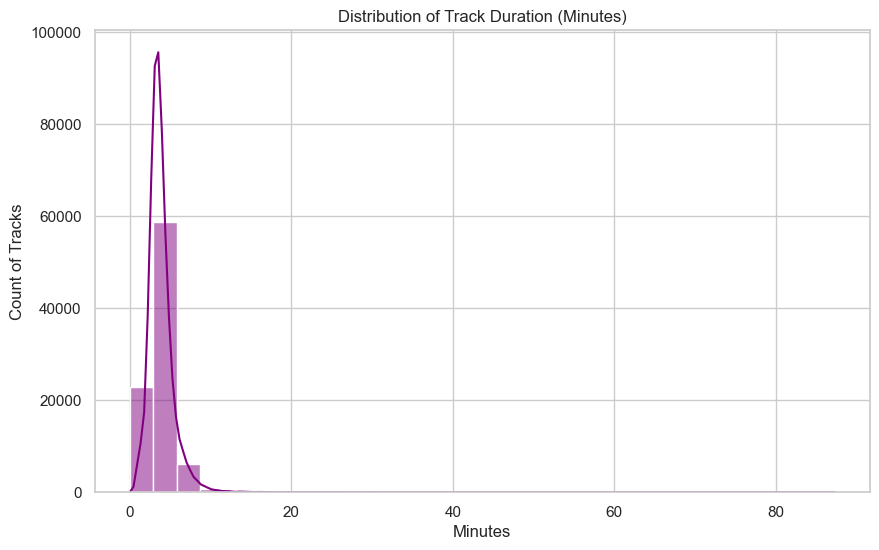

Mean Duration: 3.82 minutes


In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_music['duration_min'], bins=30, kde=True, color='purple')
plt.title('Distribution of Track Duration (Minutes)')
plt.xlabel('Minutes')
plt.ylabel('Count of Tracks')
plt.show()

print(f"Mean Duration: {df_music['duration_min'].mean():.2f} minutes")